# Final Task Project-based Internship: Home Credit Indonesia x Rakamin Academy - Data Scientist

- Nama: Rayhan Ananda Resky
- Email: rayhanananda2002@gmail.com
- LinkedIn: https://www.linkedin.com/in/rayhanananda

Pada final task kali ini, saya diberi tugas untuk membuat 2 model machine learning yang bertujuan untuk mencari nilai kredit skor pelanggan Home Credit Indonesia. Untuk memenuhi tujuan tersebut, model machine learning yang saya pilih adalah Logistic Regression dan Neural Network.


**Logistic Regression**


---

Model yang pertama saya buat adalah Logistic Regression. Untuk membuat model ini, ada beberapa tahapan yang harus saya lakukan, yaitu:

1.     Mempersiapkan Data
2.     Membagi Data
3.     Melakukan Standarization atau Normalization
4.     Pembuatan dan Pelatihan Model
5.     Evaluasi Model
6.     Optimasi Model.

Sebelum masuk ke tahapan pertama, saya akan mempersiapkan terlebih dahulu library-library yang dibutuhkan untuk membuat model Logistic Regression ini. Berikut adalah syntax yang digunakan untuk mempersiapkan library-library yang dibutuhkan.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

Setelah selesai memanggil seluruh library yang dibtuhkan, maka sudah bisa masuk ke tahapan yang pertama yaitu mempersiapkan data.

**1.     Mempersiapkan Data**

---

tahapan pertama dalam membuat model Logistic Regression adalah mempersiapkan data. Sebelum mempersiapkan data, harus memanggil dataset yang diperlukan. Berikut adalah syntax yang digunakan untuk memanggil dataset yang diperlukan.

In [2]:
df_test = pd.read_csv('/content/drive/MyDrive/Persiapan Kerja/Projects/Project-based Internship: Data Scientist/Final Project/application_test.csv')
df_train = pd.read_csv('/content/drive/MyDrive/Persiapan Kerja/Projects/Project-based Internship: Data Scientist/Final Project/application_train.csv')

Setelah selesai memanggil dataset yang digunakan, langkah selanjutnya dalam mempersiapkan data adalah Data Wrangling. Dalam data wrangling sendiri terdiri dari 3 tahapan, yaitu:

1.     Gathering Data (Mengumpulkan Data)
2.     Asessing Data (Menilai Data)
3.     Cleaning Data (Membersihkan Data)

Proses pertama dalam Data Wrangling, yaitu Gathering Data sudah dilakukan sebelumnya, sehingga masuk ke proses yang kedua yaitu menilai data. Ada beberapa hal yang dapat dilakukan pada tahapan Asessing Data (Menilai Data) ini, diantaranya:

1.     Melihat Persebaran Data
2.     Melihat informasi Data
3.     Melihat Nilai Kosong pada Data
4.     Melihat Niali Duplikat pada Data
5.     Melihat Nilai yang Tipe Datanya tidak sesuai, dan lain sebagainya.

Untuk melakukan hal-hal tersebut, berikut adalah syntax yang digunakan.

In [3]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Fungsi .head() yang digunakan pada Syntax di atas digunakan untuk melihat 5 data teratas dari dataset yang digunakan.

In [4]:
df_train.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

Selanjutnya adalah Fungsi .info(). Fungsi .info() digunakan untuk melihat informasi yang terdapat pada dataset tersebut. Informasi yang didapat biasanya nama kolom dan tipe data pada nilai kolom tersebut.

In [5]:
df_train.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

Selanjutnya yaitu fungsi .isna(). Fungsi .isna() sendiri digunakan untuk mencari nilai kosong pada sebuah kolom. Fungsi .isna() sendiri dapat digabungkan dengan fungsi lainnya yaitu .sum(). Dengan digabungkan fungsi .isna() dan fungsi .sum(), maka akan mendapatkan jumlah nilai kosong yanh terdapat dalam tabel tersebut.

In [6]:
df_train.duplicated().sum()

0

Selanjutnya adalah fungsi .duplicated(). Fungsi ini digunakan untuk mencari nilai duplikat dari sebuah dataset. Sama seperti fungsi .isna(), fungsi .duplicated() juga bisa digabungkan dengan fungsi .sum(). Gabungan dari fungsi .duplicated() dan fungsi .sum() akan menghasilkan jumlah nilai duplikat dari sebuah dataset.

In [7]:
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


Selanjutnya adalah fungsi .describe(). Fungsi .describe() ini digunakan untuk statistik analyst, karena dengan menggunakan fungsi ini, akan mendapatkan nilai mean, standard deviasi (std), min, max, Q1, Q2(median), Q3 dan max dari data numerikal yang terdapat pada dataset tersebut.

In [8]:
df_train.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


Selain fungsi .describe() yang hanya menampilkan nilai numerikal dari sebuah dataset, adalagi fungsi .describe(include='all'). Fungsi .describe(include='all') ini sama seperti fungsi .describe() biasa, akan tetapi pada fungsi .describe(include='all') ini juga akan menampilkan nilai non-numerik.

In [9]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_test.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DAYS

In [11]:
df_test.isna().sum()

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64

In [12]:
df_test.duplicated().sum()

0

In [13]:
df_test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [14]:
df_test.describe(include='all')

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744,48744,48744,48744,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
unique,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,48305,32678,32311,33658,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,277796.676350,NaN,NaN,NaN,NaN,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,NaN,NaN,NaN,NaN,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,NaN,NaN,NaN,NaN,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,NaN,NaN,NaN,NaN,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,NaN,NaN,NaN,NaN,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000


Hal yang sama juga berlaku pada dataset lainnya yang digunakan pada pembuatan model Logistic Regression kali ini. Setelah semua hal tersebut sudah dilakukan, maka proses dari Asessing Data (Menilai Data) sudah dapat dikatakan selesai. Tujuan dari proses Asessing Data (Menilai Data) sendiri adalah untuk mencari nilai-nilai yang tidak sesuai dalam sebuah tabel dan nantinya nilai-nilai yang tidak sesuai tersebut akan dibersihkan pada proses Cleaning Data (Pembersihan Data).

Proses ketiga dan terakhir dalam Data Wrangling adalah Cleaning Data (Membersihkan Data). Proses Cleaning Data (Membersihkan Data) merupakan proses lanjutan dari Asessing Data (Menilai Data). Beberapa hal yang dilakukan dalam proses Cleaning Data (Membersihkan Data) ini diantaranya:

1.     Menyesuaikan Tipe Data dengan Nilai pada Kolom
2.     Menghapus Nilai-Nilai Duplikat yang terdapat pada Tabel
3.     Mengisi ataupun Menghapus kolom yang tidak memiliki nilai didalamnya
4.     Menghapus nilai yang tidak sesuai pada kolom, dan lain sebagainya.

Karena tujuan dari pekerjaan kali ini adalah untuk membuat model Logistic Regression, maka perlu juga menghapus kolom-kolom yang tidak diperlukan. Berikut adalah syntax-syntax yang digunakan untuk melakukan Cleaning Data (Membersihkan Data).

1.     Menghapus Kolom yang Tidak Diperlukan

---



In [15]:
df_train.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
               'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
               'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
               'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
               'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
               'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
               'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
               'OWN_CAR_AGE', 'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','WEEKDAY_APPR_PROCESS_START',
               'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
               'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
               'LIVE_CITY_NOT_WORK_CITY',], axis=1, inplace=True)

In [16]:
df_test.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
               'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
               'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
               'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
               'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
               'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
               'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
               'OWN_CAR_AGE', 'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','WEEKDAY_APPR_PROCESS_START',
               'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
               'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
               'LIVE_CITY_NOT_WORK_CITY',], axis=1, inplace=True)

2.     Menghapus Nilai duplikat pada Dataset yang Akan Digunakan

---



In [17]:
df_train.drop_duplicates(inplace=True)

In [18]:
df_test.drop_duplicates(inplace=True)

In [19]:
print('Jumlah Duplikat Pada Dataframe Train: ', df_train.duplicated().sum())

Jumlah Duplikat Pada Dataframe Train:  0


In [20]:
print('Jumlah Duplikat Pada Dataframe Test: ', df_test.duplicated().sum())

Jumlah Duplikat Pada Dataframe Test:  0


3.     Menghapus Nilai yang Kosong pada Kolom

---



In [21]:
df_train.dropna(axis=1, inplace=True)

In [22]:
df_test.dropna(axis=1, inplace=True)

In [23]:
print("Jumlah Nilai Kosong pada Dataframe Train: ",df_train.isna().sum())

Jumlah Nilai Kosong pada Dataframe Train:  SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
ORGANIZATION_TYPE              0
dtype: int64


In [24]:
print('Jumlah Nilai Kosong pada Dataframe Test: ', df_test.isna().sum())

Jumlah Nilai Kosong pada Dataframe Test:  SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
ORGANIZATION_TYPE              0
dtype: int64


In [25]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 0 to 48743
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   48744 non-null  int64  
 1   NAME_CONTRACT_TYPE           48744 non-null  object 
 2   CODE_GENDER                  48744 non-null  object 
 3   FLAG_OWN_CAR                 48744 non-null  object 
 4   FLAG_OWN_REALTY              48744 non-null  object 
 5   CNT_CHILDREN                 48744 non-null  int64  
 6   AMT_INCOME_TOTAL             48744 non-null  float64
 7   AMT_CREDIT                   48744 non-null  float64
 8   AMT_GOODS_PRICE              48744 non-null  float64
 9   NAME_INCOME_TYPE             48744 non-null  object 
 10  NAME_EDUCATION_TYPE          48744 non-null  object 
 11  NAME_FAMILY_STATUS           48744 non-null  object 
 12  NAME_HOUSING_TYPE            48744 non-null  object 
 13  REGION_POPULATIO

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   NAME_INCOME_TYPE             307511 non-null  object 
 10  NAME_EDUCATION_TYPE          307511 non-null  object 
 11  NAME_FAMILY_STATUS           307511 non-null  object 
 12  NAME_HOUSING_TYPE            307511 non-null  object 
 13 

Proses dari Data Cleaning (Membersihkan Data) sudah dapat dikatakan selesai. Akan tetapi, karena tujuan dari project ini adalah untuk membuat model Logistic Regression, maka ada beberapa hal yang harus dilakukan seperti:

1.     Normalization atau Standarization
2.     Mengubah data non-numerik menjadi data numerik, dan lain sebagainya.

Untuk melakukan hal tersebut, berikut adalah syntax yang digunakan.

In [27]:
df_train['DAYS_BIRTH'] = df_train['DAYS_BIRTH']//365
df_train['DAYS_BIRTH'] = df_train['DAYS_BIRTH'].abs()
df_train['DAYS_BIRTH']

0         26
1         46
2         53
3         53
4         55
          ..
307506    26
307507    57
307508    42
307509    33
307510    47
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [28]:
df_test['DAYS_BIRTH'] = df_test['DAYS_BIRTH']//365
df_test['DAYS_BIRTH'] = df_test['DAYS_BIRTH'].abs()
df_test['DAYS_BIRTH']

0        53
1        50
2        55
3        39
4        36
         ..
48739    55
48740    31
48741    44
48742    39
48743    39
Name: DAYS_BIRTH, Length: 48744, dtype: int64

In [29]:
label_encoder = LabelEncoder()

df_train['ORGANIZATION_TYPE'] = label_encoder.fit_transform(df_train['ORGANIZATION_TYPE'])
df_train['NAME_HOUSING_TYPE'] = label_encoder.fit_transform(df_train['NAME_HOUSING_TYPE'])
df_train['NAME_FAMILY_STATUS'] = label_encoder.fit_transform(df_train['NAME_FAMILY_STATUS'])
df_train['NAME_EDUCATION_TYPE'] = label_encoder.fit_transform(df_train['NAME_EDUCATION_TYPE'])
df_train['NAME_INCOME_TYPE'] = label_encoder.fit_transform(df_train['NAME_INCOME_TYPE'])
df_train['FLAG_OWN_REALTY'] = label_encoder.fit_transform(df_train['FLAG_OWN_REALTY'])
df_train['FLAG_OWN_CAR'] = label_encoder.fit_transform(df_train['FLAG_OWN_CAR'])
df_train['CODE_GENDER'] = label_encoder.fit_transform(df_train['CODE_GENDER'])
df_train['NAME_CONTRACT_TYPE'] = label_encoder.fit_transform(df_train['NAME_CONTRACT_TYPE'])

In [30]:
df_test['ORGANIZATION_TYPE'] = label_encoder.fit_transform(df_test['ORGANIZATION_TYPE'])
df_test['NAME_HOUSING_TYPE'] = label_encoder.fit_transform(df_test['NAME_HOUSING_TYPE'])
df_test['NAME_FAMILY_STATUS'] = label_encoder.fit_transform(df_test['NAME_FAMILY_STATUS'])
df_test['NAME_EDUCATION_TYPE'] = label_encoder.fit_transform(df_test['NAME_EDUCATION_TYPE'])
df_test['NAME_INCOME_TYPE'] = label_encoder.fit_transform(df_test['NAME_INCOME_TYPE'])
df_test['FLAG_OWN_REALTY'] = label_encoder.fit_transform(df_test['FLAG_OWN_REALTY'])
df_test['FLAG_OWN_CAR'] = label_encoder.fit_transform(df_test['FLAG_OWN_CAR'])
df_test['CODE_GENDER'] = label_encoder.fit_transform(df_test['CODE_GENDER'])
df_test['NAME_CONTRACT_TYPE'] = label_encoder.fit_transform(df_test['NAME_CONTRACT_TYPE'])

In [31]:
scaler = MinMaxScaler()

normalized_train_data = scaler.fit_transform(df_train)
normalized_test_data = scaler.fit_transform(df_test)

In [32]:
df_train = pd.DataFrame(normalized_train_data, columns=df_train.columns)
df_test = pd.DataFrame(normalized_test_data, columns=df_test.columns)
print(df_train)
print(df_test)

        SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0         0.000000     1.0                 0.0          0.5           0.0   
1         0.000003     0.0                 0.0          0.0           0.0   
2         0.000006     0.0                 1.0          0.5           1.0   
3         0.000011     0.0                 0.0          0.0           0.0   
4         0.000014     0.0                 0.0          0.5           0.0   
...            ...     ...                 ...          ...           ...   
307506    0.999989     0.0                 0.0          0.5           0.0   
307507    0.999992     0.0                 0.0          0.0           0.0   
307508    0.999994     0.0                 0.0          0.0           0.0   
307509    0.999997     1.0                 0.0          0.0           0.0   
307510    1.000000     0.0                 0.0          0.0           0.0   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0   

Setelah melakukan normalization pada dataset, maka proses pertama dalam pembuatan model Logistic Regression sudah selesai, maka dapat dilanjutkan ke proses kedua yaitu pembagian data.

**2.     Pembagian Data**

---

Proses kedua yaitu Pembagian Data. Proses ini bertujuan untuk membagi data yang akan digunakan untuk melatih model dan menguji model. Pada pembagian data, saya akan membagi data menjadi 7:3. 7(70%) dari data digunakan sebagai data latih, dan 3(30%) dari data digunakan sebagai data uji. Berikut adalah syntax yang digunakan untuk melakukan proses kedua ini.


In [33]:
X = df_train.drop('TARGET', axis=1)
y = df_train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Melalui syntax tersebut, maka proses pembagian data sudah terlaksana. Maka dari itu, bisa lanjut ke proses selanjutnya dalam pembuatan model Logistic Regression, yaitu Standarization atau Normalization.

**3.     Standarization atau Normalization**

---

Langkah selanjutnya setelah membagi data adalah Standarization atau Normalization. Pada project kali ini, saya memilih menggunakan normalization. Karena saya sudah melakukan normalization sebelum membagi data, maka saya langsung menuju proses selanjutnya yaitu Pembuatan dan Pelatihan Model.

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  float64
 1   TARGET                       307511 non-null  float64
 2   NAME_CONTRACT_TYPE           307511 non-null  float64
 3   CODE_GENDER                  307511 non-null  float64
 4   FLAG_OWN_CAR                 307511 non-null  float64
 5   FLAG_OWN_REALTY              307511 non-null  float64
 6   CNT_CHILDREN                 307511 non-null  float64
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   NAME_INCOME_TYPE             307511 non-null  float64
 10  NAME_EDUCATION_TYPE          307511 non-null  float64
 11  NAME_FAMILY_STATUS           307511 non-null  float64
 12  NAME_HOUSING_TYPE            307511 non-null  float64
 13 

In [35]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   48744 non-null  float64
 1   NAME_CONTRACT_TYPE           48744 non-null  float64
 2   CODE_GENDER                  48744 non-null  float64
 3   FLAG_OWN_CAR                 48744 non-null  float64
 4   FLAG_OWN_REALTY              48744 non-null  float64
 5   CNT_CHILDREN                 48744 non-null  float64
 6   AMT_INCOME_TOTAL             48744 non-null  float64
 7   AMT_CREDIT                   48744 non-null  float64
 8   AMT_GOODS_PRICE              48744 non-null  float64
 9   NAME_INCOME_TYPE             48744 non-null  float64
 10  NAME_EDUCATION_TYPE          48744 non-null  float64
 11  NAME_FAMILY_STATUS           48744 non-null  float64
 12  NAME_HOUSING_TYPE            48744 non-null  float64
 13  REGION_POPULATIO

In [36]:
df_train[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
          'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
          'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE']]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE
0,0.0,0.5,0.0,1.0,1.000000,1.00,0.6,0.2,0.087719
1,0.0,0.0,0.0,0.0,0.571429,0.25,0.2,0.2,0.684211
2,1.0,0.5,1.0,1.0,1.000000,1.00,0.6,0.2,0.192982
3,0.0,0.0,0.0,1.0,1.000000,1.00,0.0,0.2,0.087719
4,0.0,0.5,0.0,1.0,1.000000,1.00,0.6,0.2,0.649123
...,...,...,...,...,...,...,...,...,...
307506,0.0,0.5,0.0,0.0,1.000000,1.00,0.4,1.0,0.754386
307507,0.0,0.0,0.0,1.0,0.428571,1.00,1.0,0.2,1.000000
307508,0.0,0.0,0.0,1.0,1.000000,0.25,0.4,0.2,0.684211
307509,0.0,0.0,0.0,1.0,0.142857,1.00,0.2,0.2,0.052632


In [37]:
df_test[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
          'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
          'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE']]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE
0,0.0,0.0,0.0,1.0,1.000000,0.25,0.25,0.2,0.491228
1,0.0,1.0,0.0,1.0,1.000000,1.00,0.25,0.2,0.736842
2,0.0,1.0,1.0,1.0,1.000000,0.25,0.25,0.2,0.947368
3,0.0,0.0,0.0,1.0,1.000000,1.00,0.25,0.2,0.087719
4,0.0,1.0,1.0,0.0,1.000000,1.00,0.25,0.2,0.087719
...,...,...,...,...,...,...,...,...,...
48739,0.0,0.0,0.0,1.0,1.000000,1.00,1.00,0.2,0.578947
48740,0.0,0.0,0.0,0.0,0.166667,1.00,0.25,0.2,0.894737
48741,0.0,0.0,1.0,1.0,0.166667,1.00,0.25,0.2,0.087719
48742,0.0,1.0,0.0,0.0,0.166667,0.25,0.25,0.2,0.736842


Proses normalization telah selesai dilakukan, sehingga dapat lanjut ke proses selanjutnya yaitu pembuatan dan pelatihan model.

**4.     Pembuatan dan Pelatihan Model**

---

Langkah selanjutnya pada pembuatan model Logistic Regression adalah Pembuatan dan Pelatihan Model. Berikut adalah syntax yang digunakan untuk Membuat dan Melatih Model

In [38]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

Dengan berhasilnya berjalan syntax yang digunakan, dapat dikatakan bahwa proses Pembuatan dan Pelatihan Model sudah selesai, sehingga dapat dilanjukan ke proses selanjutnya yaitu evaluasi model.

**5.     Evaluasi Model**

---

Proses selanjutnya setelah Pembuatan dan Pelatihan Model adalah evaluasi model. Berikut adalah syntax yang digunakan untuk melatih model.

In [40]:
y_predict = model.predict(X_test)

In [41]:
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9196457606174258


In [42]:
cm = confusion_matrix(y_test, y_predict)
print('Confussion Matrix: ')
print(cm)

Confussion Matrix: 
[[84841     0]
 [ 7413     0]]


In [43]:
cr = classification_report(y_test, y_predict)
print('Classification Report:')
print(cr)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     84841
         1.0       0.00      0.00      0.00      7413

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


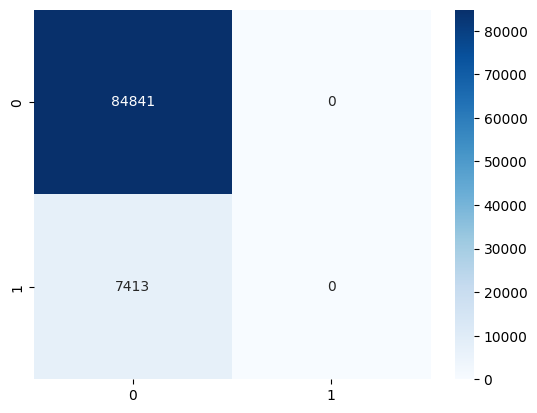

In [44]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

Ini merupakan model Logistic Regression yang sudah saya buat untuk memprediksi skor kredit dari pelanggan home credit.

**Neural Network**

---

Model kedua yang saya buat adalah Neural Network lebih tepatnya Feedforward Neural Network (FNN). Adapun proses yang saya lakukan untuk membuat FNN ini adalah sebagai berikut:

1.     Import Library
2.     Persiapkan Data
3.     Mendefinisikan Model
4.     Kompilasi Model
5.     Pelatihan Model
6.     Evaluasi Model
7.     Prediksi dengan Model
8.     Penyesuaian dan Eksperimen.

**1.     Import Library**

---

Karena dataset yang digunakan sama seperti saat membuat model Logistic Regression, maka ada beberapa proses dan library yang dilewatkan karena sudah digunakan di awal tadi. Oleh karena itu, berikut adalah library yang saya gunakan dalam pembuatan model FNN yang belum digunakan pada saat pembuatan model Logistic Regression.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras import layers, models
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

**2.     Persiapan Data**

---

Langkah selanjutnya setelah mengimport library yang digunakan adalah mempersiapkan data. Berikut adalah hal yang saya lakukan dan syntax yang saya gunakan pada proses Persiapan Data.

In [46]:
df_test = pd.read_csv('/content/drive/MyDrive/Persiapan Kerja/Projects/Project-based Internship: Data Scientist/Final Project/application_test.csv')
df_train = pd.read_csv('/content/drive/MyDrive/Persiapan Kerja/Projects/Project-based Internship: Data Scientist/Final Project/application_train.csv')

df_train.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
               'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
               'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
               'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
               'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
               'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
               'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
               'OWN_CAR_AGE', 'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','WEEKDAY_APPR_PROCESS_START',
               'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
               'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
               'LIVE_CITY_NOT_WORK_CITY',], axis=1, inplace=True)

df_test.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
               'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
               'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
               'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
               'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
               'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
               'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
               'OWN_CAR_AGE', 'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','WEEKDAY_APPR_PROCESS_START',
               'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
               'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
               'LIVE_CITY_NOT_WORK_CITY',], axis=1, inplace=True)

df_train.dropna(axis=1, inplace=True)
df_test.dropna(axis=1, inplace=True)

In [47]:
label_encoder = LabelEncoder()

df_train['ORGANIZATION_TYPE'] = label_encoder.fit_transform(df_train['ORGANIZATION_TYPE'])
df_train['NAME_HOUSING_TYPE'] = label_encoder.fit_transform(df_train['NAME_HOUSING_TYPE'])
df_train['NAME_FAMILY_STATUS'] = label_encoder.fit_transform(df_train['NAME_FAMILY_STATUS'])
df_train['NAME_EDUCATION_TYPE'] = label_encoder.fit_transform(df_train['NAME_EDUCATION_TYPE'])
df_train['NAME_INCOME_TYPE'] = label_encoder.fit_transform(df_train['NAME_INCOME_TYPE'])
df_train['FLAG_OWN_REALTY'] = label_encoder.fit_transform(df_train['FLAG_OWN_REALTY'])
df_train['FLAG_OWN_CAR'] = label_encoder.fit_transform(df_train['FLAG_OWN_CAR'])
df_train['CODE_GENDER'] = label_encoder.fit_transform(df_train['CODE_GENDER'])
df_train['NAME_CONTRACT_TYPE'] = label_encoder.fit_transform(df_train['NAME_CONTRACT_TYPE'])

In [48]:
df_test['ORGANIZATION_TYPE'] = label_encoder.fit_transform(df_test['ORGANIZATION_TYPE'])
df_test['NAME_HOUSING_TYPE'] = label_encoder.fit_transform(df_test['NAME_HOUSING_TYPE'])
df_test['NAME_FAMILY_STATUS'] = label_encoder.fit_transform(df_test['NAME_FAMILY_STATUS'])
df_test['NAME_EDUCATION_TYPE'] = label_encoder.fit_transform(df_test['NAME_EDUCATION_TYPE'])
df_test['NAME_INCOME_TYPE'] = label_encoder.fit_transform(df_test['NAME_INCOME_TYPE'])
df_test['FLAG_OWN_REALTY'] = label_encoder.fit_transform(df_test['FLAG_OWN_REALTY'])
df_test['FLAG_OWN_CAR'] = label_encoder.fit_transform(df_test['FLAG_OWN_CAR'])
df_test['CODE_GENDER'] = label_encoder.fit_transform(df_test['CODE_GENDER'])
df_test['NAME_CONTRACT_TYPE'] = label_encoder.fit_transform(df_test['NAME_CONTRACT_TYPE'])

In [49]:
X = df_train.drop('TARGET', axis=1)
y = df_train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Proses persiapan data sudah selesai dilakukan. Hal yang berbeda dalam persiapan data pada pembuatan model FNN dengan model Logistic Regression sebelumnya yaitu pada pembuatan model FNN ini saya menggunakan standarization, sedangkan pada pembuatan model Logistic Regression saya meggunakan normalization.

**3.     Mendefinisikan Model**

---

Proses selanjutnya setelah selesai Persiapan Data adalah Mendefinisikan Model. Berikut adalah syntax yang saya gunakan untuk Mendefinisikan Model.

In [51]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Setelah syntax tersebut sudah bisa dijalankan, maka proses Mendefinisikan Model sudah selesai, lanjut ke proses selanjutnya yaitu Kompilasi Model.

**4.    Kompilasi Model**

---

Berikut adalah syntax yang digunakan untuk melakukan proses Kompilasi Model

In [52]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Setelah syntax tersebut sudah bisa dijalankan, maka proses Kompilasi Model sudah selesai, lanjut ke proses selanjutnya yaitu Pelatihan Model.

**5.     Pelatihan Model**

---

Berikut adalah syntax yang saya gunakan dalam proses Pelatihan Model.

In [53]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.3)

Epoch 1/10
4709/4709 [==============================] - 16s 3ms/step - loss: 0.2752 - accuracy: 0.9187 - val_loss: 0.2707 - val_accuracy: 0.9199
Epoch 2/10
4709/4709 [==============================] - 17s 4ms/step - loss: 0.2724 - accuracy: 0.9188 - val_loss: 0.2689 - val_accuracy: 0.9199
Epoch 3/10
4709/4709 [==============================] - 17s 4ms/step - loss: 0.2715 - accuracy: 0.9188 - val_loss: 0.2696 - val_accuracy: 0.9199
Epoch 4/10
4709/4709 [==============================] - 16s 3ms/step - loss: 0.2708 - accuracy: 0.9188 - val_loss: 0.2686 - val_accuracy: 0.9199
Epoch 5/10
4709/4709 [==============================] - 15s 3ms/step - loss: 0.2703 - accuracy: 0.9188 - val_loss: 0.2677 - val_accuracy: 0.9199
Epoch 6/10
4709/4709 [==============================] - 18s 4ms/step - loss: 0.2697 - accuracy: 0.9188 - val_loss: 0.2688 - val_accuracy: 0.9199
Epoch 7/10
4709/4709 [==============================] - 15s 3ms/step - loss: 0.2692 - accuracy: 0.9188 - val_loss: 0.2679 - val_ac

Setelah selesai berjalan dan tidak ada error, maka proses Pelatihan Model sudah selesai dan bisa lanjut ke proses selanjutnya yaitu Evaluasi Model.

**6.     Evaluasi Model**

---

Berikut adalah syntax yang saya gunakan pada proses Evaluasi Model.

In [54]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')
print(f'Test Loss: {test_loss}')

2883/2883 [==============================] - 5s 2ms/step - loss: 0.2738 - accuracy: 0.9196
Test Accuracy: 0.919613242149353
Test Loss: 0.2738422155380249


Setelah selesai berjalan, dapat dilihat bahwa akurasi prediksi sebesar 0.91(91%). Angka tersebut sudah cukup besar. Setelah proses tersebut selesai, maka dapat lanjut ke proses selanjutnya yaitu Prediksi dengan model.

**7.     Prediksi dengan Model**

---

Berikut adalah syntax yang saya gunakan pada proses Prediksi dengan Model.

In [55]:
predictions = model.predict(X_test)

2883/2883 [==============================] - 4s 2ms/step


In [56]:
print(predictions)

[[0.07985505]
 [0.02829945]
 [0.04655777]
 ...
 [0.08174368]
 [0.02775985]
 [0.02642983]]


Setelah semua sudah selesai, maka dapat dikatakan bahwa pembuata model FNN sudah selesai. Akan tetapi, melihat bahwa model tersebut masih bisa diperbaiki lagi agar dapat menghasilkan prediksi yang lebih baik, maka saya melakukan perubahan pada definisi model dan pelatihan model. Proses tersebut masuk ke proses selanjutnya yaitu Penyesuaian dan eksperimen.

**8.     Penyesuain dan Eksperimen**

---

Pada proses ini, saya akan melakukan penyesuain terhadap model yang telah saya buat sebelumnya dan bereksperimen. Tujuan dari proses ini, agar model yang saya buat lebih dapat memprediksi dengan lebih baik lagi melalui penyesuain dan eksperimen yang saya lakukan. Berikut adalah syntax yang saya gunakan pada proses ini.

In [57]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(layers.Dense(64, activation='tanh'))
model.add(Dropout(rate=0.3))
model.add(layers.Dense(1, activation='sigmoid'))

In [58]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [59]:
model.fit(X_train, y_train, epochs=20, batch_size=364, validation_split=0.3)

Epoch 1/20
414/414 [==============================] - 6s 11ms/step - loss: 0.3085 - accuracy: 0.9177 - val_loss: 0.2720 - val_accuracy: 0.9199
Epoch 2/20
414/414 [==============================] - 4s 9ms/step - loss: 0.2764 - accuracy: 0.9188 - val_loss: 0.2731 - val_accuracy: 0.9199
Epoch 3/20
414/414 [==============================] - 3s 6ms/step - loss: 0.2752 - accuracy: 0.9188 - val_loss: 0.2710 - val_accuracy: 0.9199
Epoch 4/20
414/414 [==============================] - 3s 6ms/step - loss: 0.2742 - accuracy: 0.9188 - val_loss: 0.2700 - val_accuracy: 0.9199
Epoch 5/20
414/414 [==============================] - 3s 7ms/step - loss: 0.2738 - accuracy: 0.9188 - val_loss: 0.2691 - val_accuracy: 0.9199
Epoch 6/20
414/414 [==============================] - 4s 9ms/step - loss: 0.2735 - accuracy: 0.9188 - val_loss: 0.2712 - val_accuracy: 0.9199
Epoch 7/20
414/414 [==============================] - 4s 11ms/step - loss: 0.2732 - accuracy: 0.9188 - val_loss: 0.2689 - val_accuracy: 0.9199
Epoc

In [60]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')
print(f'Test Loss: {test_loss}')

2883/2883 [==============================] - 6s 2ms/step - loss: 0.2694 - accuracy: 0.9196
Test Accuracy: 0.9196457862854004
Test Loss: 0.2694462239742279


Setelah dilakukannya penyesuaian dan eksperimen pada model yang sudah saya buat, terdapat perbedaan yaitu pada total loss dan total accuracy-nya, dimana total lossnya sedikit menurun dan total accuracy-nya sedikit meningkat. Walaupun secara garis besar penurunan total loss dan peningkatan total accuracy-nya kecil, hal ini akan berbeda ketika data yang dipakai lebih besar. Oleh karena itu, perubahan sekecil apapun pada total loss dan total accuracy akan menentukan hasil prediksi dari model FNN ini.

Selanjutnya dan yang terakhir yaitu mencoba untuk melakukan prediksi dengan model yang sudah diperbaharui ini. Berikut adalah syntax yang digunakan untuk melakukan prediksi dengan model yang sudah diperbaharui ini.

In [61]:
predictions = model.predict(X_test)
print(predictions)

2883/2883 [==============================] - 9s 3ms/step
[[0.07969698]
 [0.05297263]
 [0.08145612]
 ...
 [0.14443898]
 [0.03096521]
 [0.07344491]]
